<a href="https://colab.research.google.com/github/carloshernangarrido/Raschka-Book-Examples/blob/main/tensorflow/multilayer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [3]:
iris, iris_info = tfds.load('iris', with_info=True)
print(iris_info)

Shuffling and writing examples to /root/tensorflow_datasets/iris/2.0.0.incompleteG386HN/iris-train.tfrecord


Dataset iris downloaded and prepared to /root/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='iris',
    version=2.0.0,
    description='This is perhaps the best known database to be found in the pattern recognition
literature. Fisher's paper is a classic in the field and is referenced
frequently to this day. (See Duda & Hart, for example.) The data set contains
3 classes of 50 instances each, where each class refers to a type of iris
plant. One class is linearly separable from the other 2; the latter are NOT
linearly separable from each other.',
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=tf.float32),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=150,
    splits={
        'train': 150,
    },
    supervised_keys=('features', 'label'),
    citation="""@misc{Dua:2019 ,
    author = "Dua, D

In [5]:
# Alternative: separating train and test using take() and skip()

tf.random.set_seed(1)
ds_orig = iris['train']
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)

ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

# convert dictionary to tuple
ds_train_orig = ds_train_orig.map(lambda x: (x['features'], x['label']))
ds_test = ds_test.map(lambda x: (x['features'], x['label']))


<MapDataset shapes: ((4,), ()), types: (tf.float32, tf.int64)>

In [8]:
iris_model = tf.keras.Sequential([
                                  tf.keras.layers.Dense(16, activation='sigmoid',
                                                        name='fc1', input_shape=(4,)),
                                  tf.keras.layers.Dense(3, name='fc2',
                                                        activation='softmax') ])
#  Dense = fully conected

iris_model.summary()  # 4*16+16=80, 16*3+3=51 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [11]:
# compile this model to specify the loss function, the optimizer, and the
# metrics for evaluation:
iris_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

num_epochs = 100
training_size = 100
batch_size = 2

steps_per_epoch = np.ceil(training_size / batch_size)
ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)

In [12]:
# Training
history = iris_model.fit(ds_train, epochs=num_epochs,
                         steps_per_epoch=steps_per_epoch,
                         verbose=0)

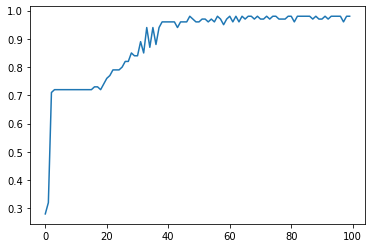

In [15]:
plt.plot(history.history['accuracy'])

In [16]:
# Evaluation in the test dataset
results = iris_model.evaluate(ds_test.batch(50), verbose=0)
print(f'test loss{results[0]}, test accuracy{results[1]}')

test loss0.15142419934272766, test accuracy0.9800000190734863
